# Adaline classifications 

By: Avia Oren & Maya Hayat

## Classification Task

Classifying the Hebrew letters "ב" "מ" "ל" using the Adaline algorithm 


### Imports

In [208]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold

# torch is needed for the Adaline algorithm
#import torch



### Reading data and Splitting into Train (80%) and Train(20%)

In [209]:
data = pd.read_csv('C:/Users/Maya/OneDrive/Desktop/vectors.csv', sep=',')
# Complete the path

##### Displaying our data

In [210]:
# Eliminating the "Mem" from the data
data = data[data['1'] != 3]

In [211]:
data

,1,-1,-1.1,-1.2,-1.3,-1.4,-1.5,-1.6,-1.7,-1.8,...,-1.63,-1.64,-1.65,-1.66,-1.67,-1.68,-1.69,-1.70,-1.71,-1.72
0,1,-1,-1,-1,-1,1,1,1,1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,1,-1,-1,-1,-1,-1,1,1,-1,-1,...,-1,1,-1,-1,-1,1,1,-1,-1,-1
3,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,1,-1,1,1,1,1,1,1,1,1,...,-1,1,-1,-1,-1,-1,1,1,1,-1
623,1,-1,-1,1,1,1,1,1,1,-1,...,1,1,-1,-1,-1,1,1,1,1,-1
624,2,-1,-1,-1,1,1,1,1,1,1,...,1,1,1,1,1,-1,-1,-1,-1,-1
625,2,-1,-1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,-1,-1,-1,-1


##### Creating the 80-20 train_test split

In [212]:
# Shuffling the data 
data = data.sample(frac=1).reset_index(drop=True)

In [213]:
# Splitting the data, 80% to train
train_ratio = 0.8

num_train = int(train_ratio * len(data))
num_test = len(data) - num_train

# Split the data into train and test sets, the data does not include the first column which is the letter representation number (1-3)
#0-80  =  80-100
train_data1 = data.iloc[:num_train, :]
test_data1 = data.iloc[num_train:, :]

#0-60 80-100  = 60-80
train_data2 = data.iloc[:num_train-num_test, :].append(data.iloc[num_train:, :])
test_data2 = data.iloc[num_train-num_test:num_train, :]

#0-40 60-100  = 40-60
print(num_train-2*num_test, num_train-num_test )
train_data3 = data.iloc[:num_train-2*num_test, 1:].append(data.iloc[num_train-num_test:, :])
test_data3 = data.iloc[num_train-2*num_test:num_train-num_test, :]

#0-20 40-100  = 20-40
train_data4 = data.iloc[:num_train-3*num_test, 1:].append(data.iloc[num_train-2*num_test:, :])
test_data4 = data.iloc[num_train-3*num_test:num_train-2*num_test, :]

#20-100  =  0-20
train_data5 = data.iloc[num_test:, :]
test_data5 = data.iloc[:num_test, :]

168 253


##### Showing the train_data (80%) and then the test_data (20%)

In [214]:
train_data1

,1,-1,-1.1,-1.2,-1.3,-1.4,-1.5,-1.6,-1.7,-1.8,...,-1.63,-1.64,-1.65,-1.66,-1.67,-1.68,-1.69,-1.70,-1.71,-1.72
0,2,-1,-1,-1,-1,1,1,1,1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,1,-1,-1,1,1,1,1,-1,-1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
2,2,-1,-1,-1,-1,-1,1,1,-1,-1,...,-1,-1,-1,1,1,1,-1,-1,-1,-1
3,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,1,-1,-1,-1,-1,1,1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
334,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
335,1,-1,-1,-1,1,1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
336,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [215]:
test_data1

,1,-1,-1.1,-1.2,-1.3,-1.4,-1.5,-1.6,-1.7,-1.8,...,-1.63,-1.64,-1.65,-1.66,-1.67,-1.68,-1.69,-1.70,-1.71,-1.72
338,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
339,2,-1,-1,-1,-1,-1,-1,-1,1,1,...,-1,-1,-1,1,1,-1,-1,-1,-1,-1
340,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,-1
341,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,1,1,1,-1,-1,-1,-1
342,2,-1,-1,-1,-1,-1,-1,1,1,-1,...,-1,-1,-1,-1,-1,1,1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
419,1,-1,1,1,1,1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
420,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
421,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [216]:
train_data2

,1,-1,-1.1,-1.2,-1.3,-1.4,-1.5,-1.6,-1.7,-1.8,...,-1.63,-1.64,-1.65,-1.66,-1.67,-1.68,-1.69,-1.70,-1.71,-1.72
0,2,-1,-1,-1,-1,1,1,1,1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,1,-1,-1,1,1,1,1,-1,-1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
2,2,-1,-1,-1,-1,-1,1,1,-1,-1,...,-1,-1,-1,1,1,1,-1,-1,-1,-1
3,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,1,-1,-1,-1,-1,1,1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
419,1,-1,1,1,1,1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
420,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
421,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [217]:
test_data2

,1,-1,-1.1,-1.2,-1.3,-1.4,-1.5,-1.6,-1.7,-1.8,...,-1.63,-1.64,-1.65,-1.66,-1.67,-1.68,-1.69,-1.70,-1.71,-1.72
253,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,1,1,-1,-1,-1,-1,-1
254,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
255,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,-1
256,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
257,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
334,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
335,1,-1,-1,-1,1,1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
336,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [218]:
train_data3

,-1,-1.1,-1.2,-1.3,-1.4,-1.5,-1.6,-1.7,-1.8,-1.9,...,-1.64,-1.65,-1.66,-1.67,-1.68,-1.69,-1.70,-1.71,-1.72,1
0,-1,-1,-1,-1,1,1,1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,NaN
1,-1,-1,1,1,1,1,-1,-1,-1,-1,...,1,-1,-1,-1,-1,-1,-1,-1,-1,NaN
2,-1,-1,-1,-1,-1,1,1,-1,-1,-1,...,-1,-1,1,1,1,-1,-1,-1,-1,NaN
3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,NaN
4,-1,-1,-1,-1,1,1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1.0
419,-1,1,1,1,1,1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1.0
420,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,2.0
421,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,2.0


In [219]:
test_data3

,1,-1,-1.1,-1.2,-1.3,-1.4,-1.5,-1.6,-1.7,-1.8,...,-1.63,-1.64,-1.65,-1.66,-1.67,-1.68,-1.69,-1.70,-1.71,-1.72
168,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
169,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,-1
170,2,1,1,1,1,1,1,-1,1,1,...,1,1,1,1,1,1,1,1,1,1
171,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
172,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
249,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
250,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
251,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [220]:
train_data4

,-1,-1.1,-1.2,-1.3,-1.4,-1.5,-1.6,-1.7,-1.8,-1.9,...,-1.64,-1.65,-1.66,-1.67,-1.68,-1.69,-1.70,-1.71,-1.72,1
0,-1,-1,-1,-1,1,1,1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,NaN
1,-1,-1,1,1,1,1,-1,-1,-1,-1,...,1,-1,-1,-1,-1,-1,-1,-1,-1,NaN
2,-1,-1,-1,-1,-1,1,1,-1,-1,-1,...,-1,-1,1,1,1,-1,-1,-1,-1,NaN
3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,NaN
4,-1,-1,-1,-1,1,1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1.0
419,-1,1,1,1,1,1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1.0
420,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,2.0
421,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,2.0


In [221]:
test_data4

,1,-1,-1.1,-1.2,-1.3,-1.4,-1.5,-1.6,-1.7,-1.8,...,-1.63,-1.64,-1.65,-1.66,-1.67,-1.68,-1.69,-1.70,-1.71,-1.72
83,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,1,1,-1,-1,-1,-1,-1
84,2,-1,-1,-1,-1,-1,1,1,-1,-1,...,-1,-1,1,1,1,1,-1,-1,-1,-1
85,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
86,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
87,1,-1,-1,1,1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
164,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
165,2,-1,-1,-1,-1,1,1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
166,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [222]:
train_data5

,1,-1,-1.1,-1.2,-1.3,-1.4,-1.5,-1.6,-1.7,-1.8,...,-1.63,-1.64,-1.65,-1.66,-1.67,-1.68,-1.69,-1.70,-1.71,-1.72
85,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
86,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
87,1,-1,-1,1,1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
88,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
89,2,-1,-1,-1,-1,-1,1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
419,1,-1,1,1,1,1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
420,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
421,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [223]:
test_data5

,1,-1,-1.1,-1.2,-1.3,-1.4,-1.5,-1.6,-1.7,-1.8,...,-1.63,-1.64,-1.65,-1.66,-1.67,-1.68,-1.69,-1.70,-1.71,-1.72
0,2,-1,-1,-1,-1,1,1,1,1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,1,-1,-1,1,1,1,1,-1,-1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
2,2,-1,-1,-1,-1,-1,1,1,-1,-1,...,-1,-1,-1,1,1,1,-1,-1,-1,-1
3,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,1,-1,-1,-1,-1,1,1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
81,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,1,1,1,-1,-1,-1,-1,-1,-1
82,1,1,-1,1,1,-1,1,1,1,1,...,1,-1,1,1,-1,1,1,1,1,-1
83,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,1,1,-1,-1,-1,-1,-1


### Starting the algorithm

In [228]:
import numpy as np

class Adaline:
    
    def __init__(self, lr=0.01, n_epochs=50, random_state=None):
        self.lr = lr
        self.n_epochs = n_epochs
        self.random_state = random_state
        self.weights = None
        self.bias = None
        self.cost_ = []
        
    def fit(self, X, y):
        if self.random_state:
            np.random.seed(self.random_state)
            
        # Initialize weights and bias
        self.weights = np.random.randn(X.shape[1])
        self.bias = np.random.randn()
        
        # Fit Adaline
        for i in range(self.n_epochs):
            error = y - self.predict(X)
            self.weights += self.lr * X.T.dot(error)
            self.bias += self.lr * error.sum()
            cost = (error**2).sum() / 2.0
            self.cost_.append(cost)
            
    def predict(self, X):
        return np.where(self.net_input(X) >= 0, 1, -1)
    
    def net_input(self, X):
        return X.dot(self.weights) + self.bias


In [229]:

# Extract the features and labels
X = data.iloc[:, 1:].values
y = np.where(data.iloc[:, 0].values != 2, -1, 1)

# Split the data into train and test sets
train_ratio = 0.8
num_train = int(train_ratio * len(X))
X_train, X_test = X[:num_train], X[num_train:]
y_train, y_test = y[:num_train], y[num_train:]

# Initialize and fit the Adaline classifier
ada = Adaline(lr=0.001, n_epochs=1000, random_state=1)
ada.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = ada.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = (y_pred == y_test).mean()
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.87


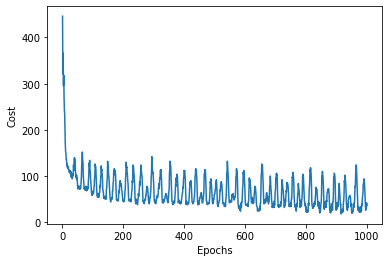

In [230]:
import matplotlib.pyplot as plt

# Initialize and fit the Adaline classifier
ada = Adaline(lr=0.001, n_epochs=1000, random_state=1)
ada.fit(X_train, y_train)

# Plot the cost function over epochs
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.show()
